In [1]:
#### Importing Required libraries

import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt

import scipy


In [2]:
#### Reading all given data

cab=pd.read_csv("Cab_data.csv")

city=pd.read_csv("City.csv")

customer=pd.read_csv("Customer_ID.csv")

Transaction=pd.read_csv("Transaction_ID.csv")

In [3]:
#### meerging all related data using merge function

Final=customer.merge(Transaction).merge(cab).merge(city)

Final

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"


In [4]:
#### Converting Date of Travel into Date time format

Final['Date of Travel'] = pd.to_datetime(Final['Date of Travel'], errors='coerce',unit='D', origin='1899-12-30')


In [5]:
#### Selecting data between given range i.e 2016-01-31 & 2018-12-31

startdate='2016-01-31'

enddate='2018-12-31'

startdate = pd.to_datetime(startdate)

enddate = pd.to_datetime(enddate)

Cab=Final[Final['Date of Travel'].between(startdate,enddate)]

Cab


,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
5,27703,Male,27,9237,10324737,Cash,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,"814,885","24,701"
6,27703,Male,27,9237,10395626,Card,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"


### EXPLORATORY DATA ANALYSIS(EDA)

In [6]:
#### Getting info about datatypes of dataset

Cab.dtypes

Customer ID                    int64
Gender                        object
Age                            int64
Income (USD/Month)             int64
Transaction ID                 int64
Payment_Mode                  object
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Population                    object
Users                         object
dtype: object

In [7]:
#### Converting data type of Transaction ID , Customer ID into object

Cab=Cab.astype({'Transaction ID':'object','Customer ID':'object'})

In [8]:
### Getting dataset information

Cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355032 entries, 1 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Customer ID         355032 non-null  object        
 1   Gender              355032 non-null  object        
 2   Age                 355032 non-null  int64         
 3   Income (USD/Month)  355032 non-null  int64         
 4   Transaction ID      355032 non-null  object        
 5   Payment_Mode        355032 non-null  object        
 6   Date of Travel      355032 non-null  datetime64[ns]
 7   Company             355032 non-null  object        
 8   City                355032 non-null  object        
 9   KM Travelled        355032 non-null  float64       
 10  Price Charged       355032 non-null  float64       
 11  Cost of Trip        355032 non-null  float64       
 12  Population          355032 non-null  object        
 13  Users               355032 no

In [9]:
#### Getting Descriptive Statistics

Cab.describe()

,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
count,355032.000000,355032.000000,355032.000000,355032.000000,355032.000000
mean,35.335933,15048.244246,22.566598,422.742351,286.165041
std,12.593311,7968.286955,12.234181,273.830796,157.997162
min,18.000000,2000.000000,1.900000,15.600000,19.000000
25%,25.000000,8424.000000,12.000000,206.160000,151.200000
50%,33.000000,14682.000000,22.440000,385.870000,282.464000
75%,42.000000,21034.000000,32.960000,582.692500,413.683200
max,65.000000,35000.000000,48.000000,2048.030000,691.200000


### DATA PRE PROCESSING

In [10]:
#### Checking for duplicate data

Cab.duplicated()

1         False
2         False
4         False
5         False
6         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 355032, dtype: bool

In [11]:
#### To print duplicate values

Cab[Cab.duplicated(keep=False)]

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users


#### We don't have duplicate data in the given dataset

In [12]:
#### Checking whether null values are there or not

Cab.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
dtype: int64

####  We don't have null values in the given dataset.

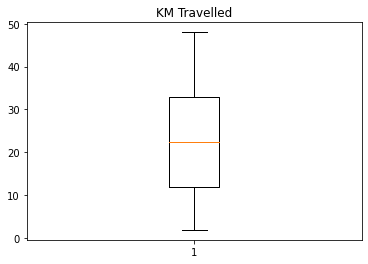

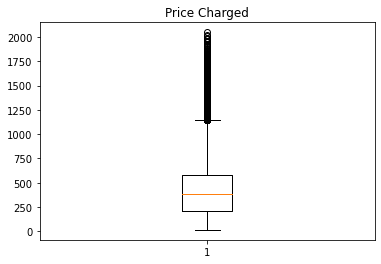

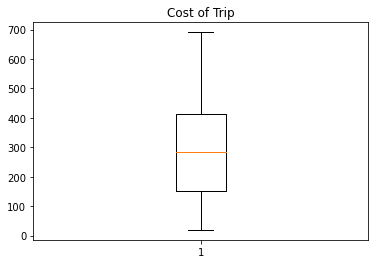

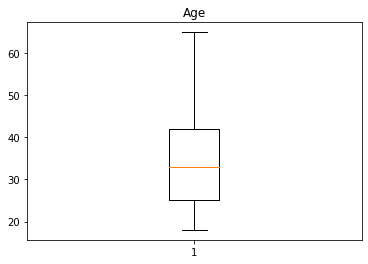

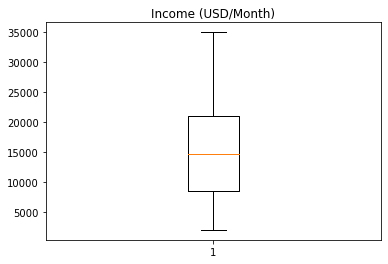

In [13]:
#### Checking for outlier presents

plt.boxplot(Cab['KM Travelled'])
plt.title("KM Travelled")
plt.show()

plt.boxplot(Cab['Price Charged'])
plt.title("Price Charged")
plt.show()

plt.boxplot(Cab['Cost of Trip'])
plt.title("Cost of Trip")
plt.show()

plt.boxplot(Cab['Age'])
plt.title("Age")
plt.show()

plt.boxplot(Cab['Income (USD/Month)'])
plt.title("Income (USD/Month)")
plt.show()

#### There are no outliers present in the dataset except price charged. but we don't have trip duration details. That's why Iam ignoring the these outliers.

### HYPOTHESIS TEST

#### Checking whether data is normally distributed or not?

* For that I am using shapiro library

In [14]:
from scipy.stats import shapiro

stat,p= shapiro(Cab["Price Charged"])

print('stat=%2f,p=%.30f' %(stat,p))

if p>0.05:
    print("Price charged is Normally Distributed")
else:
    print("Price charged is Not Normally Distributed")

stat=0.946639,p=0.000000000000000000000000000000
Price charged is Not Normally Distributed


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
from scipy.stats import shapiro

stat,p= shapiro(Cab["Cost of Trip"])

print('stat=%2f,p=%.30f' %(stat,p))

if p>0.05:
    print("Cost of Trip is Normally Distributed")
else:
    print("Cost of Trip is Not Normally Distributed")

stat=0.968788,p=0.000000000000000000000000000000
Cost of Trip is Not Normally Distributed


In [16]:
from scipy.stats import shapiro

stat,p= shapiro(Cab["KM Travelled"])

print('stat=%2f,p=%.30f' %(stat,p))

if p>0.05:
    print("KM Travelled is Normally Distributed")
else:
    print("KM Travelled is Not Normally Distributed")

stat=0.963215,p=0.000000000000000000000000000000
KM Travelled is Not Normally Distributed


#### Data is not normally dustributed.

### Checking the correlation between features.

#### I wnat to check whether Cost of Trip is depend on KM travelled or not?

In [17]:
#### Correlation test between KM travelled and Cost of trip

from scipy.stats import spearmanr 

stat,p= spearmanr(Cab["Cost of Trip"],Cab["KM Travelled"])

print('stat=%2f,p=%.30f' %(stat,p))

if p>0.05:
    print("Cost of Trip is Independent on KM Travelled ")
else:
    print("Cost of Trip is dependent on KM Travelled")

stat=0.984535,p=0.000000000000000000000000000000
Cost of Trip is dependent on KM Travelled


#### I wnat to check whether Cost of Trip is depend on Age or not?


In [18]:
#### Correlation test between KM travelled and Age

from scipy.stats import spearmanr 

stat,p= spearmanr(Cab["Cost of Trip"],Cab["Age"])

print('stat=%2f,p=%.30f' %(stat,p))

if p>0.05:
    print("Cost of Trip is Independent on Age ")
else:
    print("Cost of Trip is dependent on Age")

stat=0.000334,p=0.842123732877567032772958555142
Cost of Trip is Independent on Age 


#### I wnat to check whether Cost of Trip is depend on city or not?

In [19]:
#### Correlation test between City and Cost of trip

from scipy.stats import spearmanr 

stat,p= spearmanr(Cab["Cost of Trip"],Cab["City"])

print('stat=%2f,p=%.30f' %(stat,p))

if p>0.05:
    print("Cost of Trip is Independent on City ")
else:
    print("Cost of Trip is dependent on City")

stat=-0.000008,p=0.996318390568607270552092813887
Cost of Trip is Independent on City 


#### I wnat to check whether Cost of Trip is depend on company or not?

In [20]:
#### Correlation test between Company and Cost of trip

from scipy.stats import spearmanr 

stat,p= spearmanr(Cab["Cost of Trip"],Cab["Company"])

print('stat=%2f,p=%.30f' %(stat,p))

if p>0.05:
    print("Cost of Trip is Independent on Company")
else:
    print("Cost of Trip is dependent on Company")

stat=0.127304,p=0.000000000000000000000000000000
Cost of Trip is dependent on Company


#### I wnat to check whether Cost of Trip is depend on Gender or not?

In [21]:
#### Correlation test between Gender and Cost of trip

from scipy.stats import spearmanr 

stat,p= spearmanr(Cab["Cost of Trip"],Cab["Gender"])

print('stat=%2f,p=%.30f' %(stat,p))

if p>0.05:
    print("Cost of Trip is Independent on Gender")
else:
    print("Cost of Trip is dependent on Gender")

stat=0.000501,p=0.765347094358123758439660377917
Cost of Trip is Independent on Gender
